# 밑바닥부터 시작하는 딥러닝 3장 신경망

## 활성화 함수(activation function) - 계단 함수

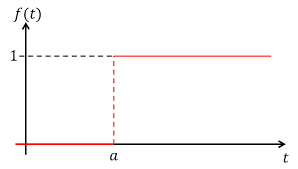

In [1]:
#0을 넘으면 1을 출력하고 그외에는 0을 출력하게 구현
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

step_function(1)

1

In [4]:
#넘파이 배열도 입력받도록 수정
import numpy as np

def step_function(x):
#y에 x에 대한 부등호 연산을 수행하여 True, False로 변환,
#그 후 astype을 이용하여 int형으로 형 변환을 하게 된다면,
#True는 1로 Fals는 0으로 변환됨
    y = x > 0
    return y.astype(np.int64)

x = np.array([-1., 1., 2.])
step_function(x)

array([0, 1, 1], dtype=int64)

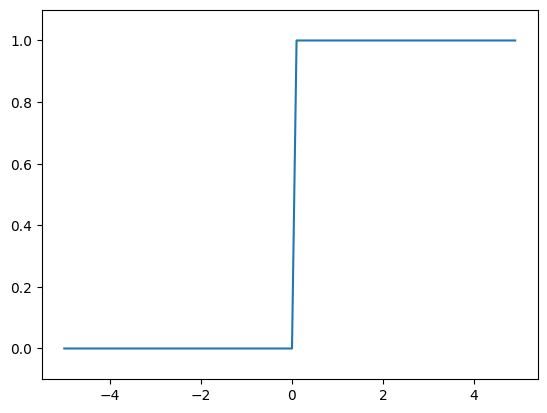

In [6]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 활성화 함수(activation function) - 시그모이드 함수

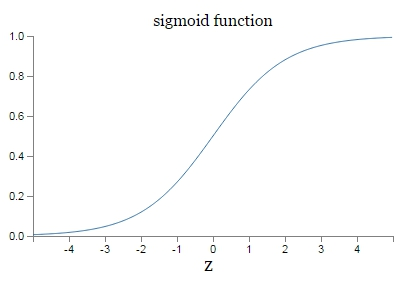

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1.0, 2.0, 3.0])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

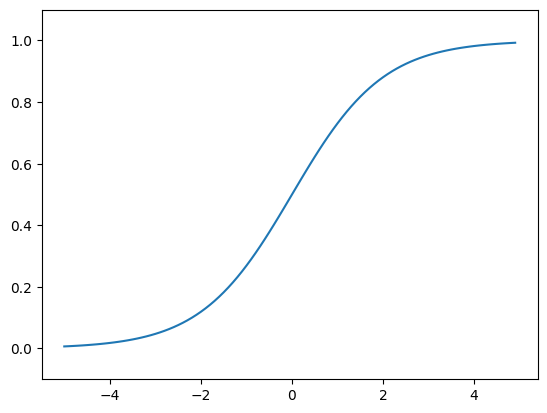

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 다차원 배열부터 활성화 함수 출력까지

In [10]:
def init_network():
    #3층 신경망 구현 w는 가중치 b는 편향임
    #편향(b)을 갯수는 가중치(W)의 열 갯수랑 똑같아야 함
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

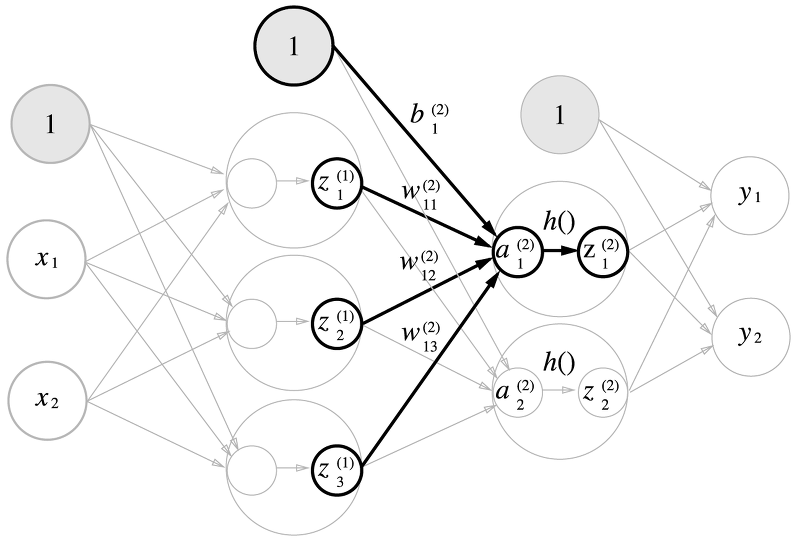

In [11]:
#위에 사진처럼 각층에서는 값을 출력하고,
#그 값을 활성화 함수에 통과시켜 다음 층에 입력으로 사용함
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    #a1은 각 가중치와 편향이 곱하고 더해진 값
    #출력값을 활성화 함수에 동과시킴(z1)
    #그 값을 다음층에 전달
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    return a3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계(항등 함수와 소프트맥스 함수)

- 항등 함수 : 입력 신호 = 출력 신호

- 소프트맥스 함수 : 다중 클래스 분류시 사용되는 함수

주로 회귀에는 항등 함수를 분류에는 소프트맥스 함수를 사용함

소프트맥스 함수를 구현해보겠음

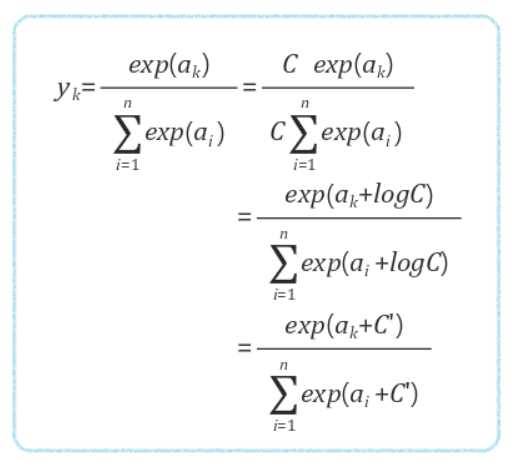

In [12]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #지수 함수에서 발생하는 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

#소프트맥스의 가장 큰 특징은 모든 값을 더해서 1.0이 나온다.
#그 이유는 가령 고양이 개를 분류하는 모델이 일때, 소프트 맥스는 확률값으로 나타낸다.
#강아지일 경우 강아지 0.7, 고양이 0.3 이런식으로 말이다.
#즉, 100에 확률에서 분류하기 때문에 총합은 1.0이 나온다.
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0